# Linear Models

by Yesman Choque Mamani (<a href="https://github.com/yesmanic/Machine_Learning_Models">view on GitHub</a>)

This notebook demonstrates the application of Linear Models for data prediction, utilizing the scikit-learn library. It provides a step-by-step guide on how to train a Linar Model, make predictions, and evaluate the model's performance.

## Initial Setup

Let's import the necessary libraries and load the dataset.

In [138]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_regression, make_classification, load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.svm import SVC

## Linear Models for Regression

### Linear Regression

Linear regression is a ordinary least squares (OLS) method for estimating the unknown parameters in a linear function that relates the independent variable to the dependent variable. The method minimizes the following cost function:
$$ RSS(\pmb w, b) = \sum^N_{i = 0} (y_i - \hat y_i)^2 = \sum^N_{i = 0} (y_i - (\pmb w^T \pmb x_i + b))^2 $$

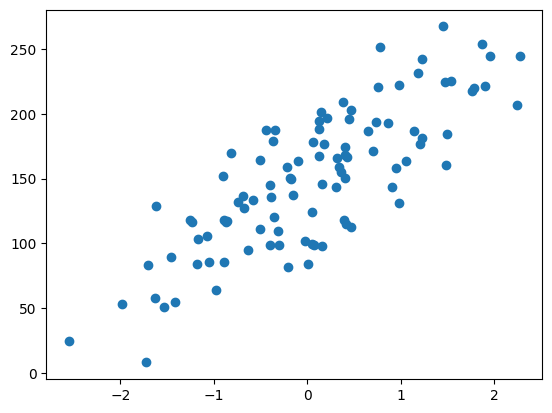

In [139]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       bias=150, noise=30, random_state=0)

plt.plot(X, y, 'o');

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
        .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
        .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
        .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


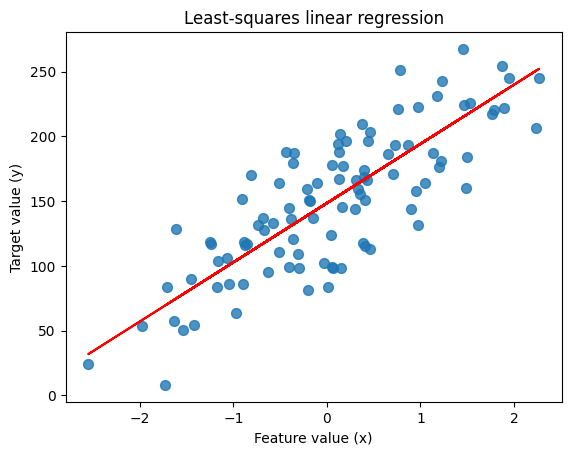

In [141]:
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Ridge Regression

Ridge regression is a linear regression model that uses L2 regularization to prevent overfitting. It adds a penalty term to the loss function, which is the sum of the squared weights multiplied by the regularization parameter alpha.

$$ RSS_{L2}(\pmb w, b) = \sum^N_{i = 0} (y_i - (\pmb w^T \pmb x_i + b))^2 + \alpha (\pmb w^T \pmb w)$$

In [142]:
ridge_reg =  Ridge(alpha=10).fit(X_train, y_train)

print('ridge regression linear model coeff (w): {}'
        .format(ridge_reg.coef_))
print('ridge regression linear model intercept (b): {:.3f}'
        .format(ridge_reg.intercept_))
print('R-squared score (training): {:.3f}'
        .format(ridge_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(ridge_reg.score(X_test, y_test)))

ridge regression linear model coeff (w): [40.44291442]
ridge regression linear model intercept (b): 148.468
R-squared score (training): 0.670
R-squared score (test): 0.532


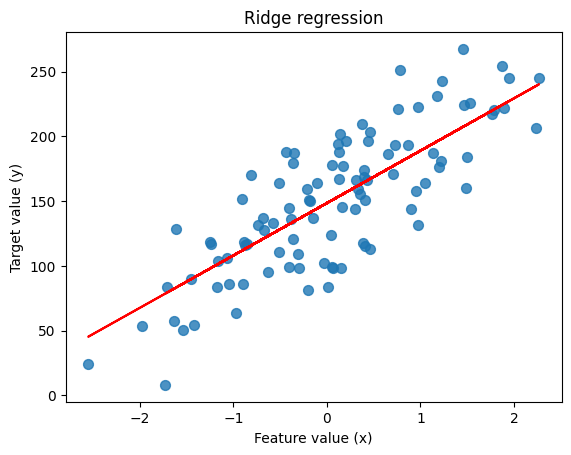

In [143]:
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, ridge_reg.coef_ * X + ridge_reg.intercept_, 'r-')
plt.title('Ridge regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Lasso Regression

Lasso regression is a linear regression model that uses L1 regularization to prevent overfitting. It adds a penalty term to the loss function, which is the sum of the absolute weights multiplied by the regularization parameter alpha.

$$ RSS_{L1}(\pmb w, b) = \sum^N_{i = 0} (y_i - (\pmb w^T \pmb x_i + b))^2 + \alpha ||\pmb w||_1$$

In [144]:
lasso_reg = Lasso(alpha=10).fit(X_train, y_train)

print('lasso regression linear model coeff (w): {}'
        .format(lasso_reg.coef_))
print('lasso regression linear model intercept (b): {:.3f}'
        .format(lasso_reg.intercept_))
print('R-squared score (training): {:.3f}'
        .format(lasso_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(lasso_reg.score(X_test, y_test)))

lasso regression linear model coeff (w): [35.94347697]
lasso regression linear model intercept (b): 148.487
R-squared score (training): 0.648
R-squared score (test): 0.545


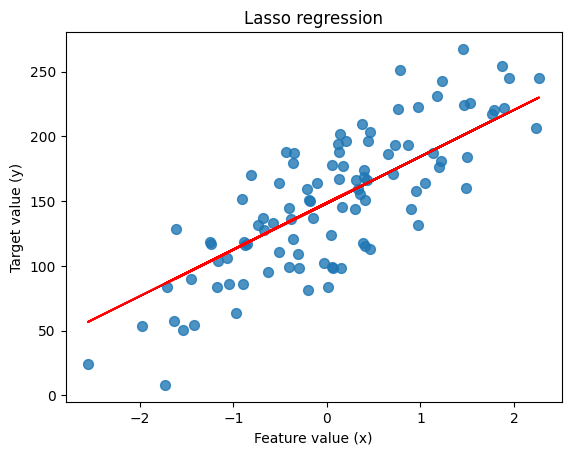

In [145]:
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, lasso_reg.coef_ * X + lasso_reg.intercept_, 'r-')
plt.title('Lasso regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Normalization

Normalization can contribute to a faster convergence of the optimization algorithm. It is recommended to normalize the input features before training the model.

In [146]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg_with_scaling = Ridge(alpha=10).fit(X_train_scaled, y_train)
ridge_reg = Ridge(alpha=10).fit(X_train, y_train)

In [147]:
print('Ridge regression with feature scaling')
print('R-squared score (training): {:.3f}'
        .format(ridge_reg_with_scaling.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
        .format(ridge_reg_with_scaling.score(X_test_scaled, y_test)))

print('\nRidge regression without feature scaling')
print('R-squared score (training): {:.3f}'
        .format(ridge_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
        .format(ridge_reg.score(X_test, y_test)))

Ridge regression with feature scaling
R-squared score (training): 0.484
R-squared score (test): 0.412

Ridge regression without feature scaling
R-squared score (training): 0.165
R-squared score (test): 0.145


### Polynomial Regression

Polynomial regression is a linear regression model that uses polynomial features to fit a non-linear function. It adds polynomial features to the input data and then applies linear regression to the transformed data.

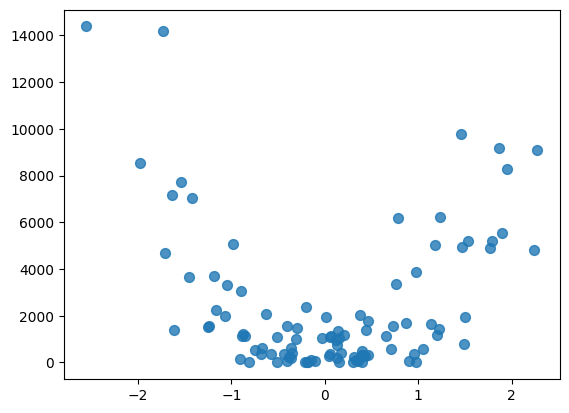

In [148]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=20, random_state=0)
y = y ** 2
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8);

In [149]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

In [150]:
score = linreg.score(X_test, y_test)
print('(poly deg 2) linear model coeff (w):\n{}'
        .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
        .format(linreg.intercept_))

print('R-squared score (test): {:.3f}'
        .format(score))

score = linreg.score(X_train, y_train)
print('R-squared score (training): {:.3f}'
        .format(score))

(poly deg 2) linear model coeff (w):
[ -84.04661046 2053.6247847 ]
(poly deg 2) linear model intercept (b): 385.486
R-squared score (test): 0.230
R-squared score (training): 0.708


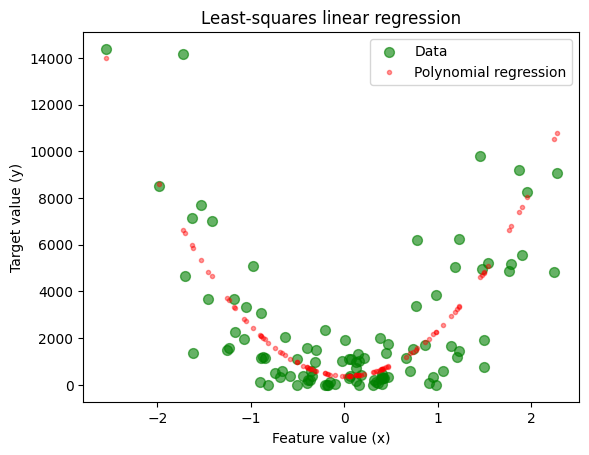

In [151]:
plt.scatter(X, y, color='green', marker= 'o', s=50, alpha=0.6, label='Data')
plt.plot(X, linreg.predict(X_poly), 'r.', alpha=0.4, label='Polynomial regression')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.legend()
plt.show()

## Linear Models for Classification

### Logistic Regression

Logistic regression is a linear model for binary classification. It uses the logistic function to model the probability that the output belongs to a particular class.

In summary, logistic regression is a linear regression but with the output passed through a logistic function.

$$ \hat y = \sigma (z) = \sigma( \pmb{w}^T \cdot \pmb{x} + b ) = \dfrac{1}{1 + e^{-( \pmb w^T \cdot \pmb x + b )}} $$

By default, logistic regression uses L2 regularization to prevent overfitting.

In [152]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=0.3, flip_y=0.1,
                           n_redundant=0, n_clusters_per_class=1, random_state=0)

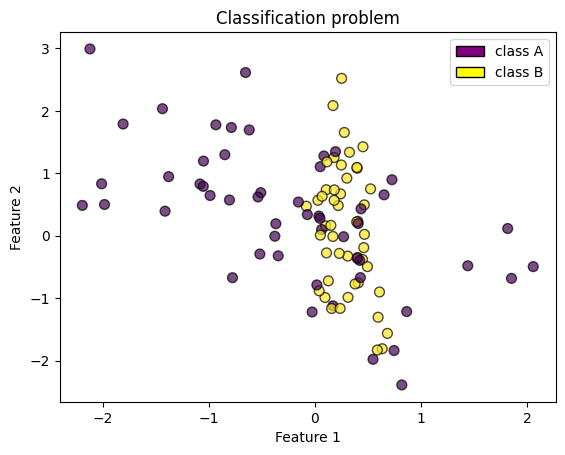

In [153]:
plt.scatter(X[:, 0], X[:, 1], marker= 'o', s=50, alpha=0.7, c=y, edgecolors='k');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification problem')

patch0 = mpatches.Patch(facecolor='purple', label='class A', edgecolor='k')
patch1 = mpatches.Patch(facecolor='yellow', label='class B', edgecolor='k')
plt.legend(handles=[patch0, patch1])
plt.show()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)

In [155]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
        .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
        .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.73
Accuracy of Logistic regression classifier on test set: 0.72


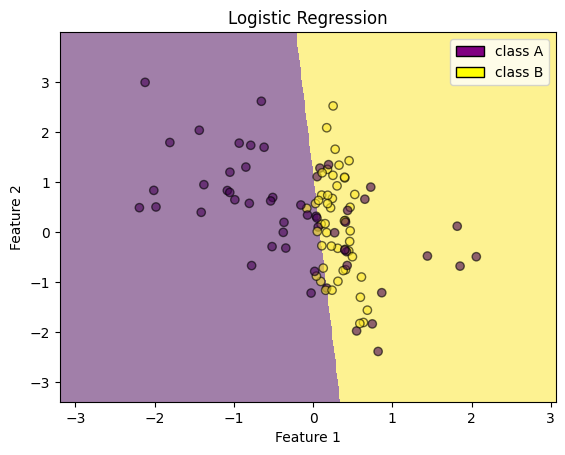

In [156]:
mesh_step_size = 0.01

x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1

feature0_meshgrid, feature1_meshgrid = np.meshgrid(np.arange(x0_min, x0_max, mesh_step_size),
                                                   np.arange(x1_min, x1_max, mesh_step_size))

Z = clf.predict(np.c_[feature0_meshgrid.ravel(), feature1_meshgrid.ravel()])
Z = Z.reshape(feature0_meshgrid.shape)

plt.figure()
plt.pcolormesh(feature0_meshgrid, feature1_meshgrid, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k', alpha=0.6)
plt.title('Logistic Regression')

patch0 = mpatches.Patch(facecolor='purple', label='class A', edgecolor='k')
patch1 = mpatches.Patch(facecolor='yellow', label='class B', edgecolor='k')
plt.legend(handles=[patch0, patch1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Support Vector Machines

Support vector machines (SVM) is a linear model for binary classification. It finds the hyperplane that best separates the data into two classes. The hyperplane is the one that maximizes the margin between the two classes.

In [187]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=1, flip_y=0.1,
                           n_redundant=0, n_clusters_per_class=1, random_state=0)

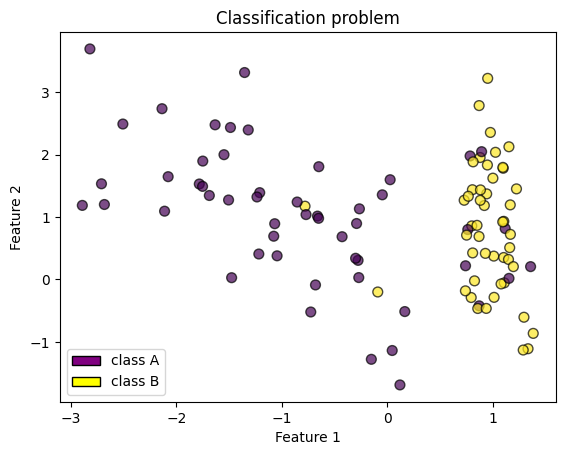

In [188]:
plt.scatter(X[:, 0], X[:, 1], marker= 'o', s=50, alpha=0.7, c=y, edgecolors='k');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification problem')

patch0 = mpatches.Patch(facecolor='purple', label='class A', edgecolor='k')
patch1 = mpatches.Patch(facecolor='yellow', label='class B', edgecolor='k')
plt.legend(handles=[patch0, patch1])
plt.show()

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(kernel='linear', C=1.0).fit(X_train, y_train)

In [190]:
score = clf.score(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
        .format(score))

score = clf.score(X_test, y_test)
print('Accuracy of SVC classifier on test set: {:.2f}'
        .format(score))

Accuracy of SVC classifier on training set: 0.89
Accuracy of SVC classifier on test set: 0.92


In [191]:
def plot_class_regions_for_classifier_subplot(clf, X, y, title, subplot):
    mesh_step_size = 0.01   

    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    feature0_meshgrid, feature1_meshgrid = np.meshgrid(np.arange(x0_min, x0_max, mesh_step_size),
                                                    np.arange(x1_min, x1_max, mesh_step_size))

    Z = clf.predict(np.c_[feature0_meshgrid.ravel(), feature1_meshgrid.ravel()])
    Z = Z.reshape(feature0_meshgrid.shape)

    subplot.contourf(feature0_meshgrid, feature1_meshgrid, Z, alpha=0.5)
    subplot.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k', alpha=0.6)
    subplot.set_title(title)

    patch0 = mpatches.Patch(facecolor='purple', label='class A', edgecolor='k')
    patch1 = mpatches.Patch(facecolor='yellow', label='class B', edgecolor='k')
    subplot.legend(handles=[patch0, patch1])

    subplot.set_xlabel('Feature 1')
    subplot.set_ylabel('Feature 2')

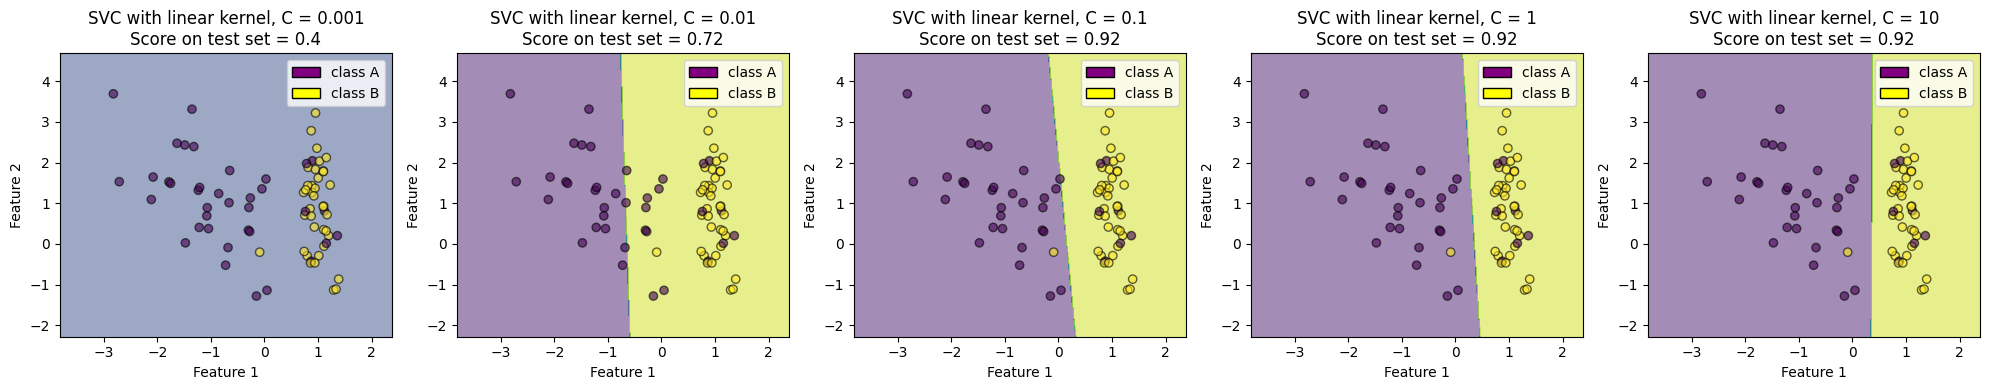

In [196]:
c = [0.001, 0.01, 0.1, 1, 10]
fig, subplots = plt.subplots(1, 5, figsize=(20, 4))

for c_value, subplot in zip(c, subplots):
    clf = SVC(kernel='linear', C=c_value).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    title = 'SVC with linear kernel, C = {}\nScore on test set = {}'.format(c_value, score)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, title, subplot)

plt.tight_layout()